In [1]:
from utils.results import *

In [2]:
# settings for the plots,
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  

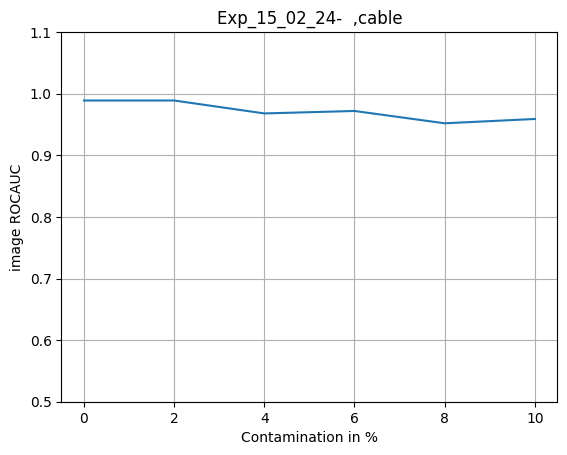

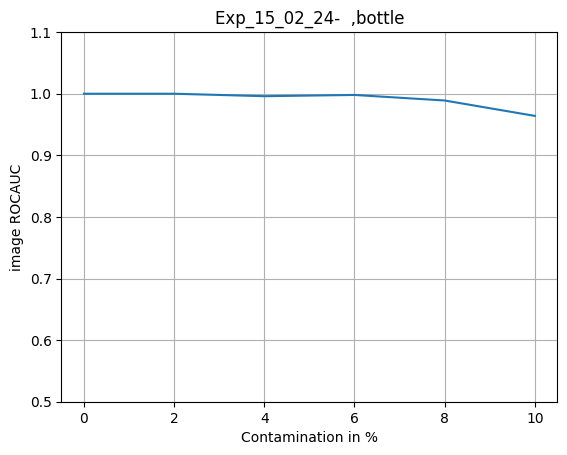

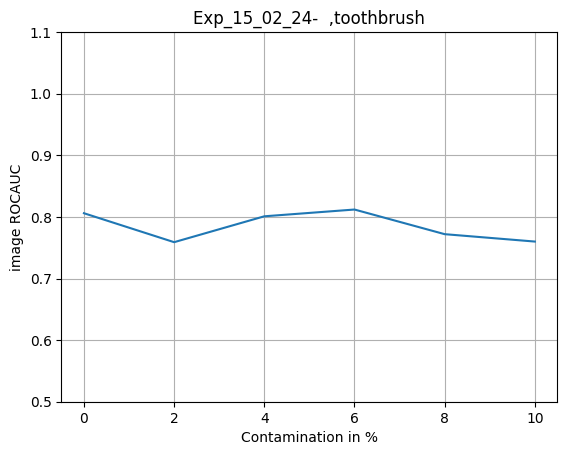

In [3]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")

['cable', 'leather', 'bottle', 'screw', 'metal_nut', 'toothbrush']


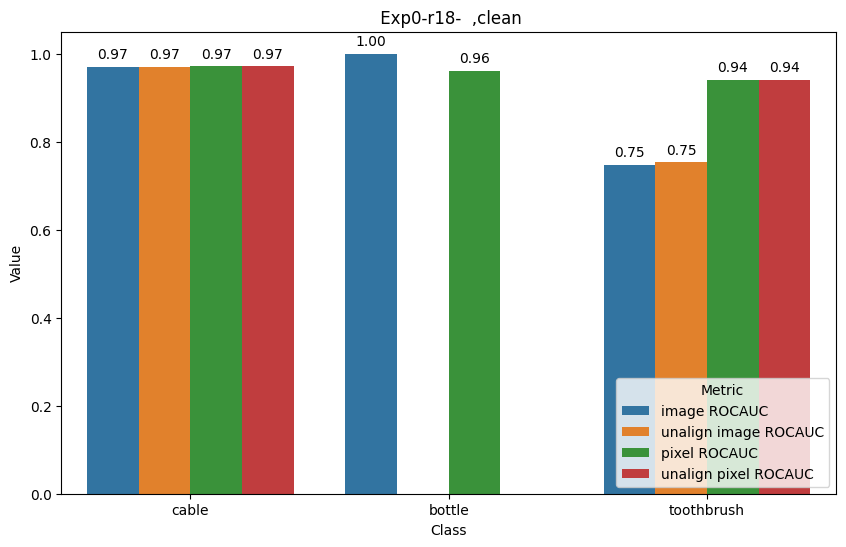

['bottle', 'toothbrush', 'leather', 'cable']


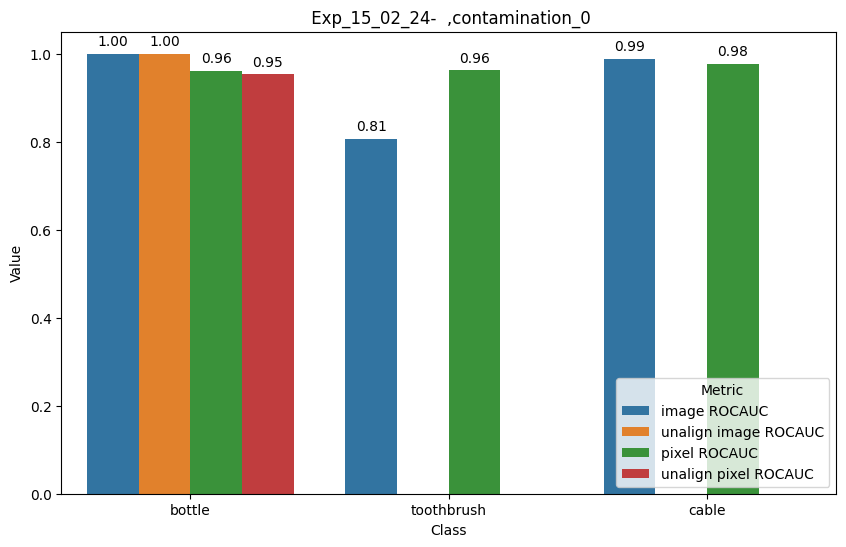

['toothbrush', 'bottle', 'cable']


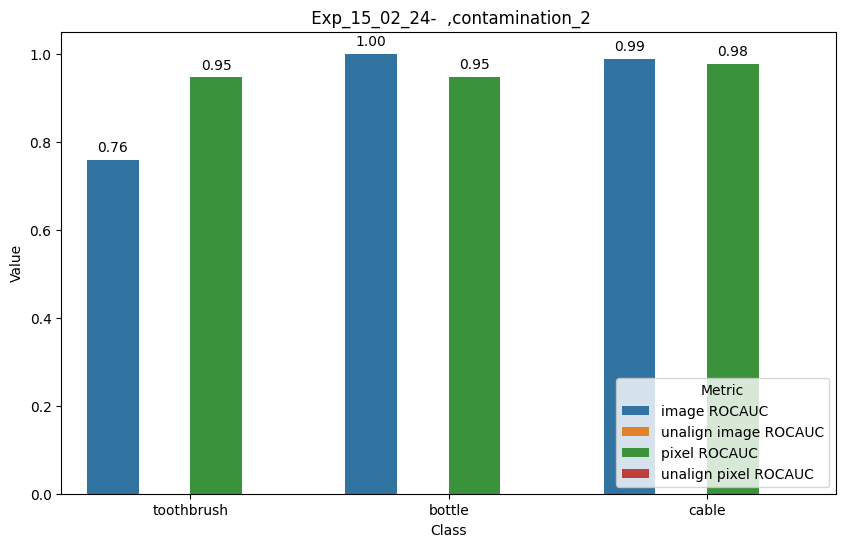

['toothbrush', 'bottle', 'cable']


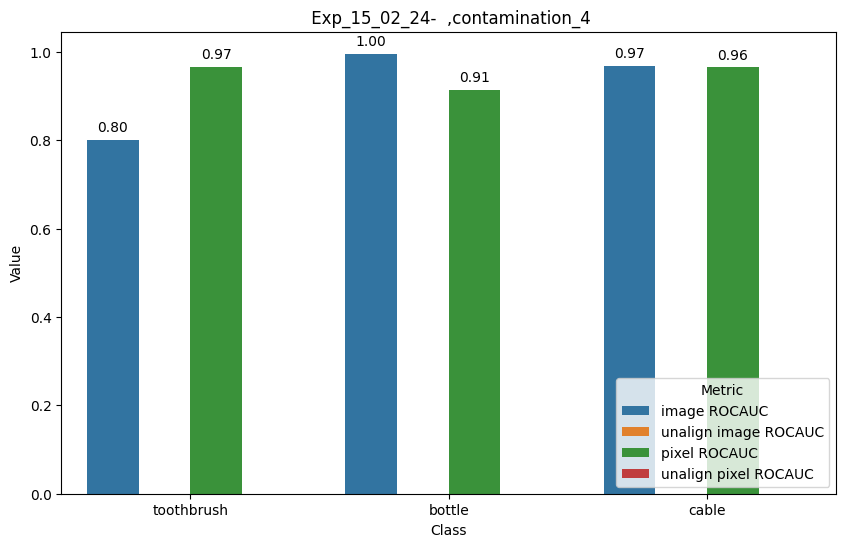

['toothbrush', 'bottle', 'cable']


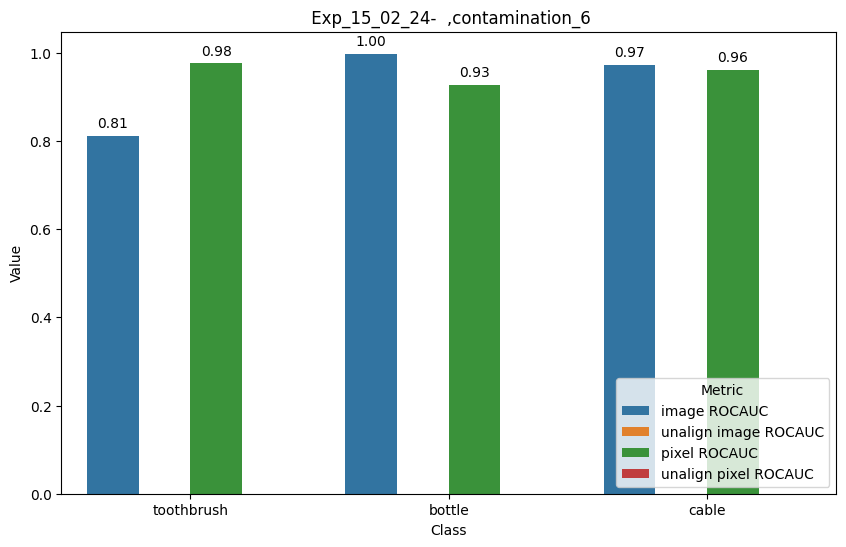

['toothbrush', 'bottle', 'cable']


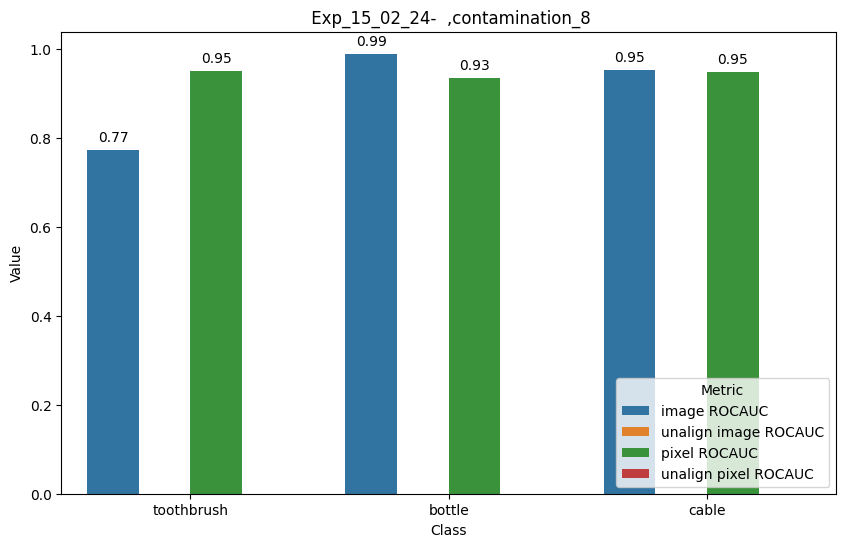

['toothbrush', 'bottle', 'cable']


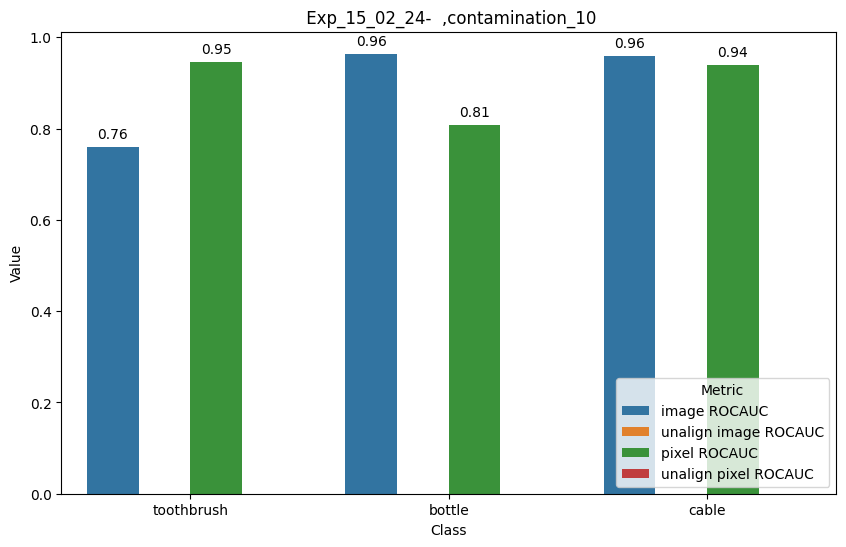

In [4]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

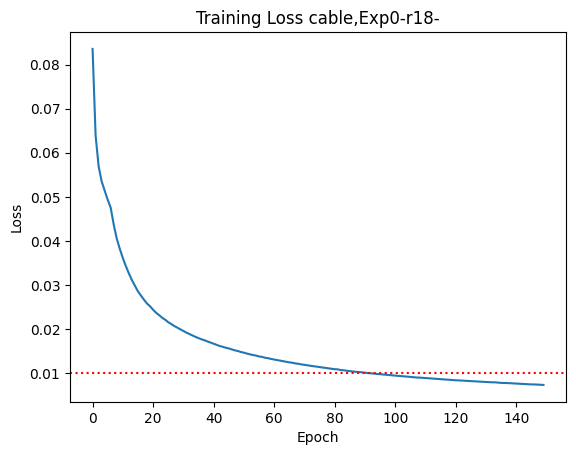

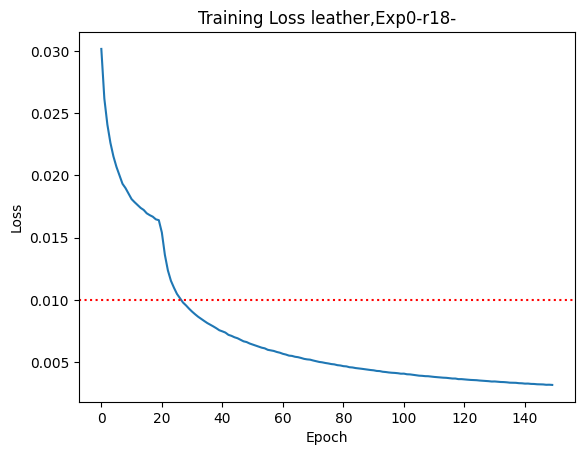

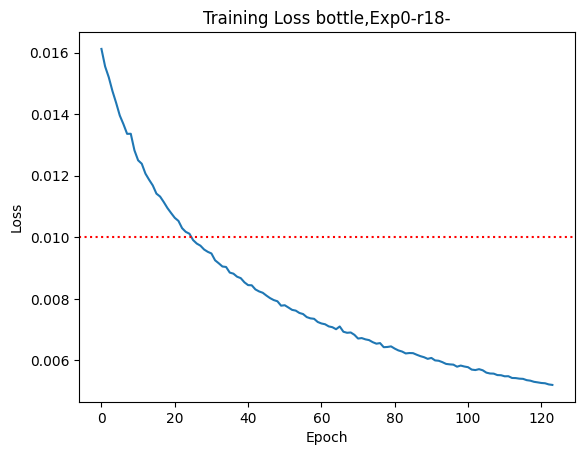

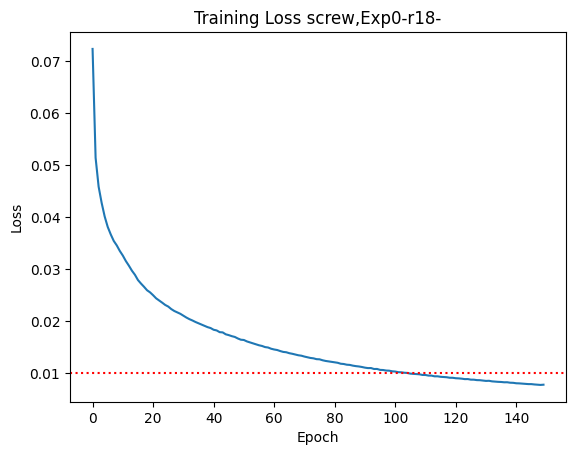

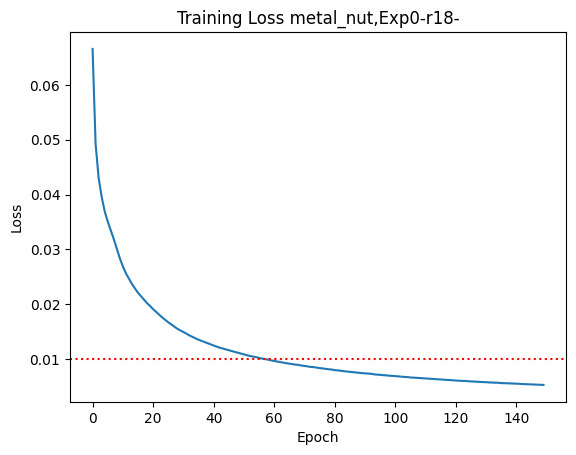

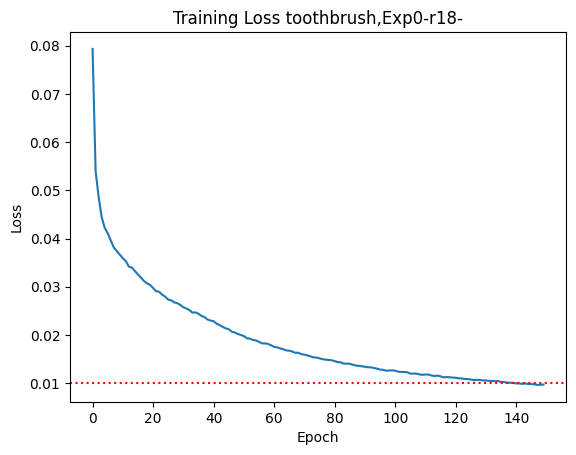

In [5]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

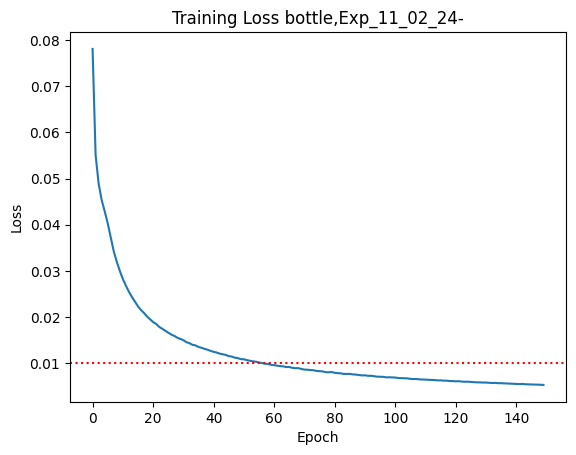

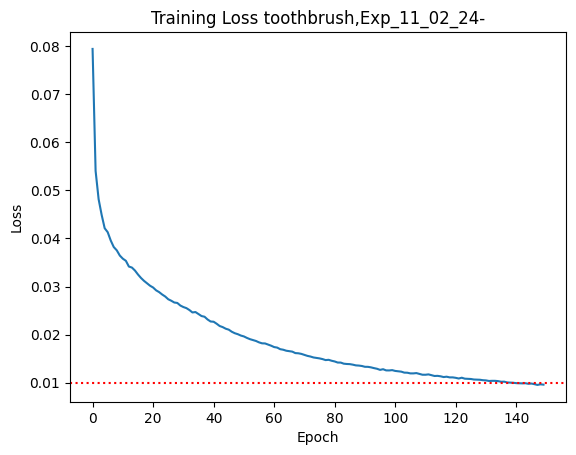

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec/contamination_0/Exp_11_02_24-leather/args.log'

In [6]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

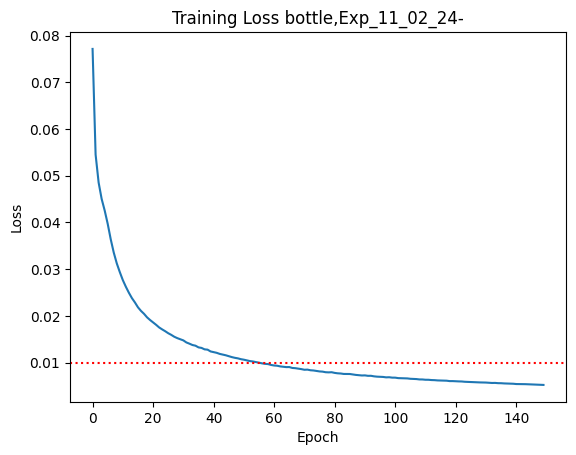

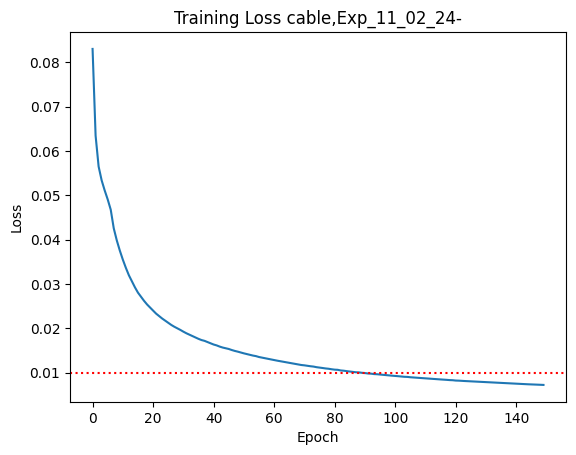

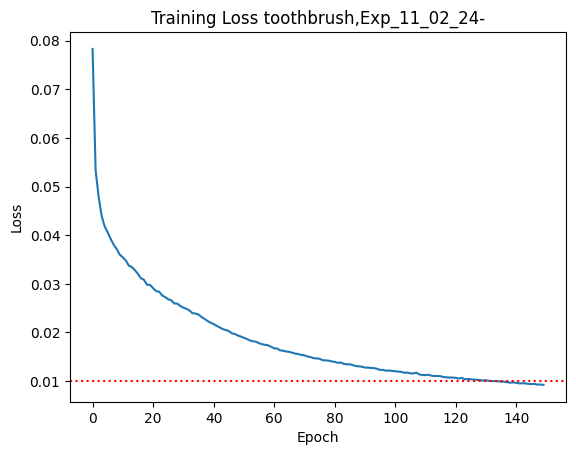

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")